#TASK 2  Restaurant Recommendation System
This restaurant recommendation system task requires building a content-based filtering system that matches users with restaurants based on their preferences. The task involves four main steps: first, preprocessing the dataset by handling missing values and converting categorical data like cuisine types into numerical format; second, establishing clear criteria for recommendations including cuisine preferences, price ranges, and rating thresholds; third, implementing the actual recommendation algorithm that uses similarity metrics to match user preferences with restaurant features; and finally, testing the system with sample user preferences to evaluate its effectiveness in providing relevant recommendations. The ultimate goal is to create a reliable system that can suggest restaurants aligned with users' specific preferences and requirements.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform
pd.reset_option('display.max_rows')

In [ ]:
from scipy.spatial.distance import pdist, squareform
pd.reset_option('display.max_rows')

In [ ]:
# Creating a Dataframe
df = pd.read_csv('/content/Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:

dfRS = df[['Restaurant ID','Restaurant Name','Cuisines','Aggregate rating','Votes']]
dfRS

,Restaurant ID,Restaurant Name,Cuisines,Aggregate rating,Votes
0,6317637,Le Petit Souffle,"French, Japanese, Desserts",4.8,314
1,6304287,Izakaya Kikufuji,Japanese,4.5,591
2,6300002,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4.4,270
3,6318506,Ooma,"Japanese, Sushi",4.9,365
4,6314302,Sambo Kojin,"Japanese, Korean",4.8,229
...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,Turkish,4.1,788
9547,5908749,Ceviz A��ac۱,"World Cuisine, Patisserie, Cafe",4.2,1034
9548,5915807,Huqqa,"Italian, World Cuisine",3.7,661
9549,5916112,A���k Kahve,Restaurant Cafe,4.0,901


In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

#DATA CLEANING

In [ ]:
# Columns Description
def dataDesc():
    listItem = []
    for col in dfRS.columns :
        listItem.append(
            [col,
            dfRS[col].dtype,
            dfRS[col].isna().sum(),
            round(dfRS[col].isna().sum()/len(dfRS)*100,2),
            dfRS[col].nunique(),
            list(dfRS[col].drop_duplicates().sample(2).values)]
        )
    descData = pd.DataFrame(data = listItem,
                            columns = ['Column','Data Type', 'Missing Value',
                                        'Pct Missing Value', 'Num Unique', 'Unique Sample'])
    return descData

dataDesc()

,Column,Data Type,Missing Value,Pct Missing Value,Num Unique,Unique Sample
0,Restaurant ID,int64,0,0.00,9551,"[301514, 1655]"
1,Restaurant Name,object,0,0.00,7446,"[Love to Wish, Raju Fast Food]"
2,Cuisines,object,9,0.09,1825,"[Asian, European, Seafood, Japanese, Korean]"
3,Aggregate rating,float64,0,0.00,33,"[4.1, 2.1]"
4,Votes,int64,0,0.00,1012,"[1653, 3370]"


In [ ]:
dfRS = dfRS.dropna()


In [ ]:
dfRS

,Restaurant ID,Restaurant Name,Cuisines,Aggregate rating,Votes
0,6317637,Le Petit Souffle,"French, Japanese, Desserts",4.8,314
1,6304287,Izakaya Kikufuji,Japanese,4.5,591
2,6300002,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4.4,270
3,6318506,Ooma,"Japanese, Sushi",4.9,365
4,6314302,Sambo Kojin,"Japanese, Korean",4.8,229
...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,Turkish,4.1,788
9547,5908749,Ceviz A��ac۱,"World Cuisine, Patisserie, Cafe",4.2,1034
9548,5915807,Huqqa,"Italian, World Cuisine",3.7,661
9549,5916112,A���k Kahve,Restaurant Cafe,4.0,901


In [ ]:

# Renaming the Columns
dfRS = dfRS.rename(columns={'Restaurant ID': 'restaurant_id'})
dfRS = dfRS.rename(columns={'Restaurant Name': 'restaurant_name'})
dfRS = dfRS.rename(columns={'Cuisines': 'cuisines'})
dfRS = dfRS.rename(columns={'Aggregate rating': 'aggregate_rating'})
dfRS = dfRS.rename(columns={'Votes': 'votes'})

In [ ]:
dfRS


,restaurant_id,restaurant_name,cuisines,aggregate_rating,votes
0,6317637,Le Petit Souffle,"French, Japanese, Desserts",4.8,314
1,6304287,Izakaya Kikufuji,Japanese,4.5,591
2,6300002,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4.4,270
3,6318506,Ooma,"Japanese, Sushi",4.9,365
4,6314302,Sambo Kojin,"Japanese, Korean",4.8,229
...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,Turkish,4.1,788
9547,5908749,Ceviz A��ac۱,"World Cuisine, Patisserie, Cafe",4.2,1034
9548,5915807,Huqqa,"Italian, World Cuisine",3.7,661
9549,5916112,A���k Kahve,Restaurant Cafe,4.0,901


In [ ]:
dfRS.duplicated().sum()

0

In [ ]:
dfRS['restaurant_name'].duplicated().sum()

2105

In [ ]:
dfRS['restaurant_name'].value_counts()

,count
restaurant_name,
Cafe Coffee Day,83
Domino's Pizza,79
Subway,63
Green Chick Chop,51
McDonald's,48
...,...
The Town House Cafe,1
The G.T. Road,1
The Darzi Bar & Kitchen,1


In [ ]:
dfRS = dfRS.sort_values(by=['restaurant_name','aggregate_rating'],ascending=False)

In [ ]:
dfRS[dfRS['restaurant_name']=="Domino's Pizza"].head()

,restaurant_id,restaurant_name,cuisines,aggregate_rating,votes
3031,143,Domino's Pizza,"Pizza, Fast Food",3.7,336
1844,5065,Domino's Pizza,"Pizza, Fast Food",3.6,146
2448,15078,Domino's Pizza,"Pizza, Fast Food",3.6,86
7618,18263236,Domino's Pizza,"Pizza, Fast Food",3.6,24
8437,384,Domino's Pizza,"Pizza, Fast Food",3.6,547


In [ ]:
# Dropping duplicaes keeping only first Value.
dfRS = dfRS.drop_duplicates('restaurant_name',keep='first')
dfRS

,restaurant_id,restaurant_name,cuisines,aggregate_rating,votes
9523,6000871,�ukura��a Sofras۱,"Kebab, Izgara",4.4,296
3120,18222559,{Niche} - Cafe & Bar,"North Indian, Chinese, Italian, Continental",4.1,492
9334,7100938,wagamama,"Japanese, Asian",3.7,131
9454,6401789,tashas,"Cafe, Mediterranean",4.1,374
4659,18361747,t Lounge by Dilmah,"Cafe, Tea, Desserts",3.6,34
...,...,...,...,...,...
8692,18317511,#Urban Caf��,"North Indian, Chinese, Italian",3.3,49
6998,18336489,#OFF Campus,"Cafe, Continental, Italian, Fast Food",3.7,216
2613,18311951,#InstaFreeze,Ice Cream,0.0,2
9148,18378803,#Dilliwaala6,North Indian,3.7,124


In [ ]:
dfRS['restaurant_name'].value_counts()

,count
restaurant_name,
�ukura��a Sofras۱,1
French Toast,1
Fourteen Eleven Tea Cafe,1
Fozzie's Pizzaiolo,1
Frasers,1
...,...
Pizza Street,1
Pizza Treat,1
Pizza Yum,1


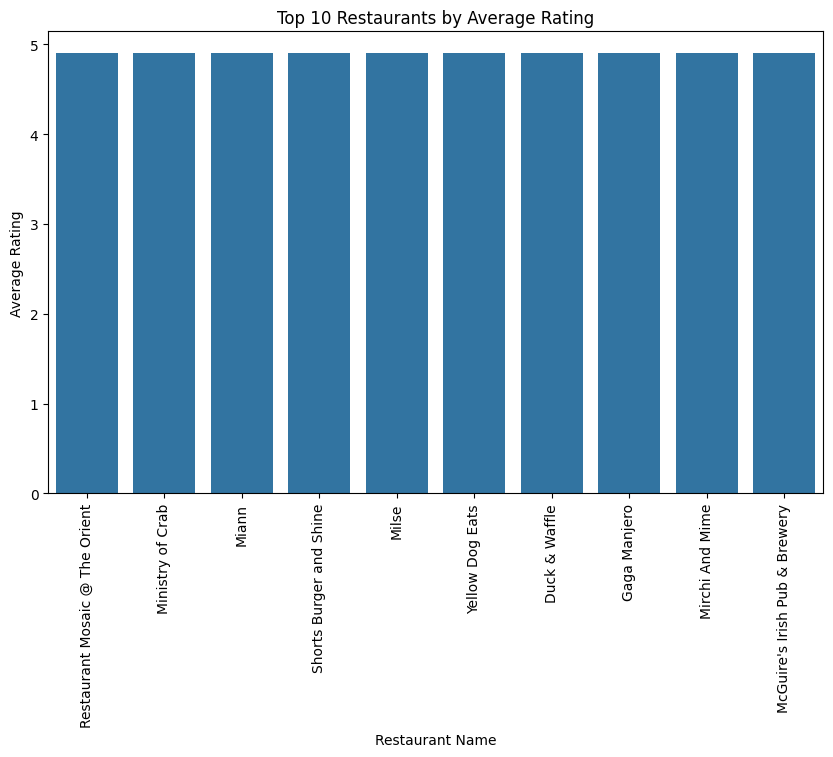

In [ ]:
# Selecting the top 10 restaurants based on their average rating
top_restaurants = df.groupby('Restaurant Name')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

# Create a figure with specified size
plt.figure(figsize=(10, 6))

# Create a bar plot with the selected top restaurants
sns.barplot(x=top_restaurants.index, y=top_restaurants.values)

# Set title and labels
plt.title('Top 10 Restaurants by Average Rating')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Rating')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=90)

# Display the plot
plt.show()


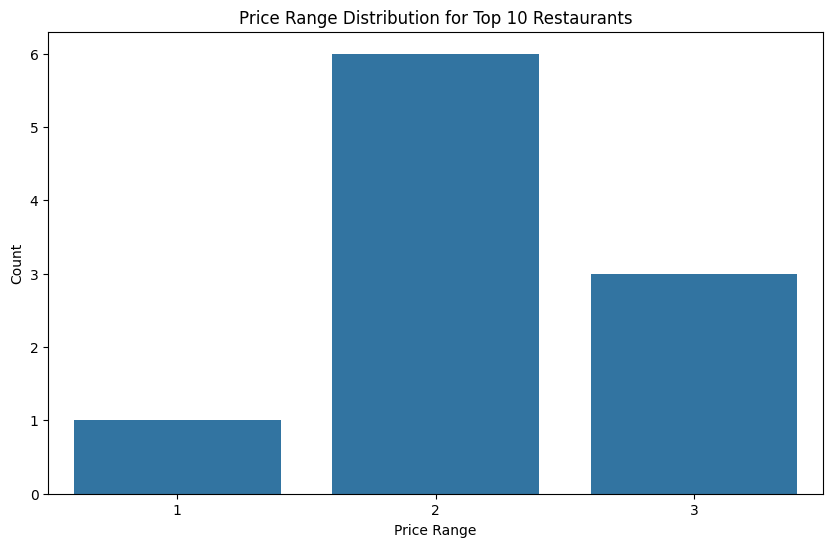

In [ ]:
# Extract the price range for the top 10 restaurants
top_restaurants_price = df.groupby('Restaurant Name')['Price range'].first().head(10)

# a bar plot for price range distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=top_restaurants_price)
plt.title('Price Range Distribution for Top 10 Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

In [ ]:
dfRS[dfRS['restaurant_name']=="Domino's Pizza"].head()

,restaurant_id,restaurant_name,cuisines,aggregate_rating,votes
3031,143,Domino's Pizza,"Pizza, Fast Food",3.7,336


In [ ]:
# Dropping duplicaes only keeping first Value.
dfRS = dfRS.drop_duplicates('restaurant_name',keep='first')
dfRS

,restaurant_id,restaurant_name,cuisines,aggregate_rating,votes
9523,6000871,�ukura��a Sofras۱,"Kebab, Izgara",4.4,296
3120,18222559,{Niche} - Cafe & Bar,"North Indian, Chinese, Italian, Continental",4.1,492
9334,7100938,wagamama,"Japanese, Asian",3.7,131
9454,6401789,tashas,"Cafe, Mediterranean",4.1,374
4659,18361747,t Lounge by Dilmah,"Cafe, Tea, Desserts",3.6,34
...,...,...,...,...,...
8692,18317511,#Urban Caf��,"North Indian, Chinese, Italian",3.3,49
6998,18336489,#OFF Campus,"Cafe, Continental, Italian, Fast Food",3.7,216
2613,18311951,#InstaFreeze,Ice Cream,0.0,2
9148,18378803,#Dilliwaala6,North Indian,3.7,124


In [ ]:
dfRS['restaurant_name'].value_counts()

,count
restaurant_name,
�ukura��a Sofras۱,1
French Toast,1
Fourteen Eleven Tea Cafe,1
Fozzie's Pizzaiolo,1
Frasers,1
...,...
Pizza Street,1
Pizza Treat,1
Pizza Yum,1


In [ ]:
dfRS = dfRS[dfRS['aggregate_rating']>=4.0]
dfRS

,restaurant_id,restaurant_name,cuisines,aggregate_rating,votes
9523,6000871,�ukura��a Sofras۱,"Kebab, Izgara",4.4,296
3120,18222559,{Niche} - Cafe & Bar,"North Indian, Chinese, Italian, Continental",4.1,492
9454,6401789,tashas,"Cafe, Mediterranean",4.1,374
9385,6113857,sketch Gallery,"British, Contemporary",4.5,148
1837,18418247,feel ALIVE,"North Indian, American, Asian, Biryani",4.7,69
...,...,...,...,...,...
1468,18408054,19 Flavours Biryani,"Mughlai, Hyderabadi",4.1,84
2484,18233317,145 Kala Ghoda,"Fast Food, Beverages, Desserts",4.2,1606
2292,2100784,11th Avenue Cafe Bistro,"Cafe, American, Italian, Continental",4.1,377
751,2600031,10 Downing Street,"North Indian, Chinese",4.0,257


In [ ]:
# Split Cuisines into list
dfRS['cuisines'] = dfRS['cuisines'].str.split(', ')
dfRS

<ipython-input-24-efc97d03e156>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfRS['cuisines'] = dfRS['cuisines'].str.split(', ')


,restaurant_id,restaurant_name,cuisines,aggregate_rating,votes
9523,6000871,�ukura��a Sofras۱,"[Kebab, Izgara]",4.4,296
3120,18222559,{Niche} - Cafe & Bar,"[North Indian, Chinese, Italian, Continental]",4.1,492
9454,6401789,tashas,"[Cafe, Mediterranean]",4.1,374
9385,6113857,sketch Gallery,"[British, Contemporary]",4.5,148
1837,18418247,feel ALIVE,"[North Indian, American, Asian, Biryani]",4.7,69
...,...,...,...,...,...
1468,18408054,19 Flavours Biryani,"[Mughlai, Hyderabadi]",4.1,84
2484,18233317,145 Kala Ghoda,"[Fast Food, Beverages, Desserts]",4.2,1606
2292,2100784,11th Avenue Cafe Bistro,"[Cafe, American, Italian, Continental]",4.1,377
751,2600031,10 Downing Street,"[North Indian, Chinese]",4.0,257


In [ ]:
# Exploding 'cuisines'
dfRS = dfRS.explode('cuisines')
dfRS

,restaurant_id,restaurant_name,cuisines,aggregate_rating,votes
9523,6000871,�ukura��a Sofras۱,Kebab,4.4,296
9523,6000871,�ukura��a Sofras۱,Izgara,4.4,296
3120,18222559,{Niche} - Cafe & Bar,North Indian,4.1,492
3120,18222559,{Niche} - Cafe & Bar,Chinese,4.1,492
3120,18222559,{Niche} - Cafe & Bar,Italian,4.1,492
...,...,...,...,...,...
2292,2100784,11th Avenue Cafe Bistro,Italian,4.1,377
2292,2100784,11th Avenue Cafe Bistro,Continental,4.1,377
751,2600031,10 Downing Street,North Indian,4.0,257
751,2600031,10 Downing Street,Chinese,4.0,257


In [ ]:
# Cuisines Check
dfRS['cuisines'].value_counts()

,count
cuisines,
North Indian,270
Italian,237
Chinese,200
Continental,199
Cafe,177
...,...
Pub Food,1
Durban,1
Irish,1


In [ ]:
# Cross Tabulate Restaurant Name and Cuisines
xTabRestoCuisines = pd.crosstab(dfRS['restaurant_name'],
                                dfRS['cuisines'])

In [ ]:
xTabRestoCuisines

cuisines,Afghani,African,American,Andhra,Arabian,Argentine,Asian,Asian Fusion,Australian,Awadhi,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
restaurant_name,,,,,,,,,,,,,,,,,,,,,
'Ohana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Downing Street,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11th Avenue Cafe Bistro,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145 Kala Ghoda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19 Flavours Biryani,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feel ALIVE,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sketch Gallery,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tashas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Checking on restaurant name value
xTabRestoCuisines.loc['feel ALIVE'].values

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Resto Names Sample
dfRS['restaurant_name'].sample(20, random_state=101)

,restaurant_name
439,Mrs. Wilkes' Dining Room
9545,Baltazar
6921,Rose Cafe
108,Big City Bread Cafe
2311,Olive Bistro
120,Transmetropolitan
4387,Maxims Pastry Shop
9222,Meraki
9359,Mimi's Bakehouse
2438,Cappuccino Blast


In [ ]:
# Measure Similarity
print(jaccard_score(xTabRestoCuisines.loc["Olive Bistro"].values,
                    xTabRestoCuisines.loc["Rose Cafe"].values))

0.3333333333333333


In [ ]:
jaccardDist = pdist(xTabRestoCuisines.values, metric='jaccard')
jaccardMatrix = squareform(jaccardDist)
jaccardSim = 1 - jaccardMatrix
dfJaccard = pd.DataFrame(
    jaccardSim,
    index=xTabRestoCuisines.index,
    columns=xTabRestoCuisines.index)

dfJaccard

restaurant_name,'Ohana,10 Downing Street,11th Avenue Cafe Bistro,145 Kala Ghoda,19 Flavours Biryani,1918 Bistro & Grill,2 Dog,22nd Parallel,3 Wise Monkeys,38 Barracks,...,Zoeys Pizzeria,Zolocrust - Hotel Clarks Amer,Zombie Burger + Drink Lab,Zuka Choco-la,Zunzi's,feel ALIVE,sketch Gallery,tashas,{Niche} - Cafe & Bar,�ukura��a Sofras۱
restaurant_name,,,,,,,,,,,,,,,,,,,,,
'Ohana,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.0
10 Downing Street,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.200000,...,0.0,0.0,0.0,0.000000,0.00,0.200000,0.0,0.0,0.500000,0.0
11th Avenue Cafe Bistro,0.0,0.0,1.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.333333,...,0.0,0.4,0.0,0.000000,0.00,0.142857,0.0,0.2,0.333333,0.0
145 Kala Ghoda,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.2,0.333333,0.00,0.000000,0.0,0.0,0.000000,0.0
19 Flavours Biryani,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feel ALIVE,0.0,0.2,0.142857,0.0,0.0,0.0,0.166667,0.0,0.0,0.600000,...,0.0,0.0,0.0,0.000000,0.00,1.000000,0.0,0.0,0.142857,0.0
sketch Gallery,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.00,0.000000,1.0,0.0,0.000000,0.0
tashas,0.0,0.0,0.200000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.25,0.000000,0.0,1.0,0.000000,0.0


In [ ]:
# Resto Names Sample
dfRS['restaurant_name'].sample(25)

,restaurant_name
9390,Hakkasan
123,Miyabi Kyoto Japanese Steak House
3994,Hauz Khas Social
9513,The Sizzle
9538,Starbucks
67,Les 3 Brasseurs
1858,Boombox Brewstreet
294,Houndstooth Grill & Tavern
7039,Frosty Rollies
2526,Checker's


#Final Recommendation System

---



---



In [ ]:
# Input Initial Restaurant Name
resto = 'Starbucks'

sim = dfJaccard.loc[resto].sort_values(ascending=False)

sim = pd.DataFrame({'restaurant_name': sim.index, 'simScore': sim.values})
sim = sim[(sim['restaurant_name']!= resto) & (sim['simScore']>=0.7)].head(5)

# Merge The Rating
RestoRec = pd.merge(sim,dfRS[['restaurant_name','aggregate_rating']],how='inner',on='restaurant_name')
FinalRestoRec = RestoRec.sort_values('aggregate_rating',ascending=False).drop_duplicates('restaurant_name',keep='first')

In [ ]:
FinalRestoRec

,restaurant_name,simScore,aggregate_rating
3,Blue Tokai Coffee Roasters,1.0,4.4
2,The Whippet,1.0,4.3
4,Strawberry Fields,1.0,4.1
0,Hearken Caf��,1.0,4.0
1,The Tea Lounge - Taj Palace Hotel,1.0,4.0


#CONCLUSION
The restaurant recommendation system successfully matches users with restaurants based on their preferences, such as cuisine and price range, through a content-based filtering approach. By preprocessing the dataset (handling missing values and encoding categorical variables), the system generates personalized recommendations. The quality of the recommendations can be assessed by testing with sample user preferences, ensuring that the system effectively identifies restaurants that align with individual tastes and criteria. This approach enhances the user experience by providing tailored dining options.